**COLOR IDENTIFICATION IN IMAGES - THE SPARKS FOUNDATION INTERNSHIP PROJECT**

**made by Szimonetta Farkas | Data Scientist**

**Objective:** 

Implement an image color detector which identifies all the colors in an image or a video.

**Machine Learning Algorithm**:
K-Means

**Importing Libraries**

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

In [30]:
import warnings
warnings.filterwarnings("ignore")

**Reading a Sample Image, Understanding the Basic Operations**

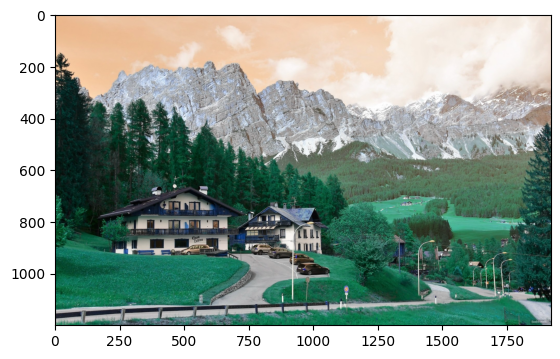

In [34]:
image = cv2.imread(r'E:\Data_Science\INTERNSHIP\The_Sparks_Foundation\Color_Identification\images\dolomits.jpg')
plt.imshow(image)

In [7]:
# By default OpenCV reads the images in BGR. 

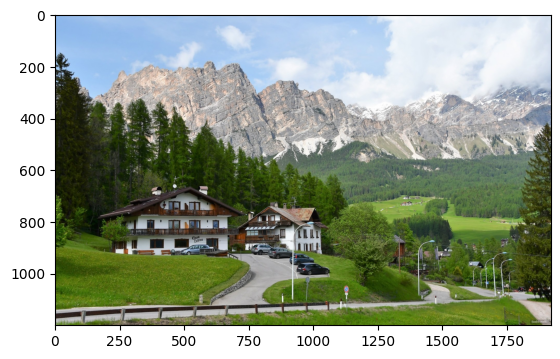

In [11]:
# Converting to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [12]:
print('The type of the input is', type(image))
print('The shape of the input:', image.shape)

The type of the input is <class 'numpy.ndarray'>
The shape of the input: (1200, 1920, 3)


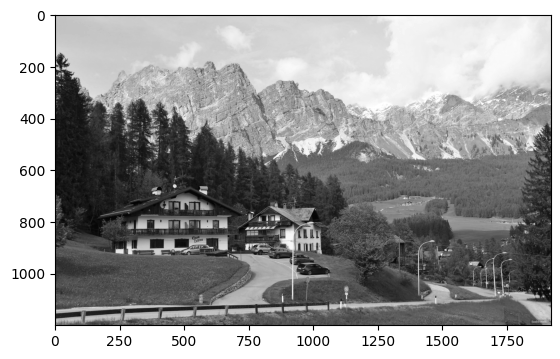

In [13]:
# optionally we can convert the image to gray color
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

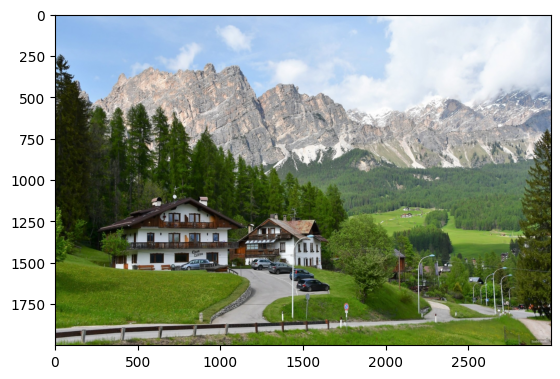

In [17]:
# we can resize the image if it is needed
resized_image = cv2.resize(image, (3000, 2000))
plt.imshow(resized_image)

**Color identification**

In [19]:
# identifying color from image

In [20]:
# hex values of the colors which will be identified

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [21]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [32]:
# KMeans expects flattened array as input during its fit method.
# I need to reshape the image using numpy.
# I apply KMeans to first fit and predict on the image to get the results.
# The cluster colors are identified and arranged in the correct order.
# Plotting the colors as a pie chart.


def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([101.46559603, 116.79654655,  90.38046742]),
 array([170.91075299, 202.09592393, 239.21806614]),
 array([60.25500718, 73.57942582, 29.96806545]),
 array([187.51273256, 183.77504071, 180.93884905]),
 array([229.03477402, 235.15041117, 242.41926436]),
 array([151.83184916, 153.56960473, 144.78273512]),
 array([31.68358895, 39.20010708, 13.68831292]),
 array([ 89.94748446, 115.89466271,  30.78761062])]

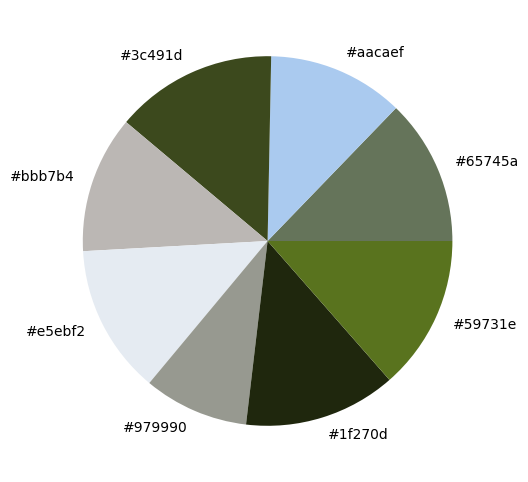

In [35]:
get_colors(get_image(r'E:\Data_Science\INTERNSHIP\The_Sparks_Foundation\Color_Identification\images\dolomits.jpg'), 8, True)

**Searching Images Using Colors**

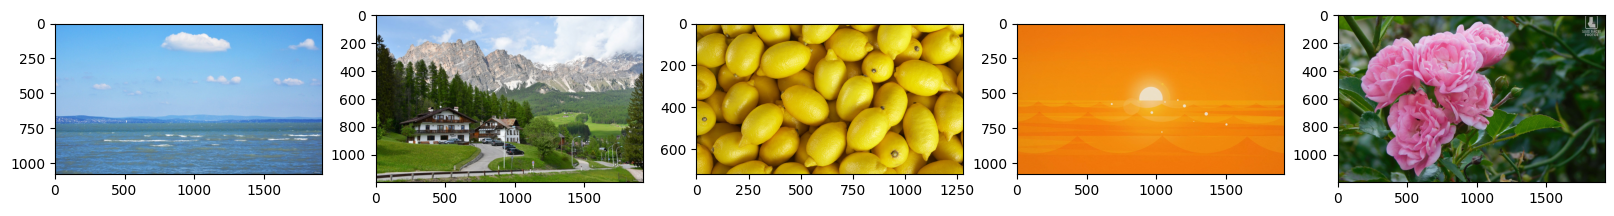

In [36]:
# images
IMAGE_DIRECTORY = (r'E:\Data_Science\INTERNSHIP\The_Sparks_Foundation\Color_Identification\images')
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))
        
        
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [37]:
# matching with the top 10 colors of the image
# no extact match for the hex codes --> calculating the similarity between the chosen color and the colors of the image
# Keeping a threshold value such that if the difference between the chosen color and 
# any of the selected colors is less than that threshold --> match
# Hex values or RGB values cannot be directly compared --> converting to a device independant and color uniform space.

def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [38]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

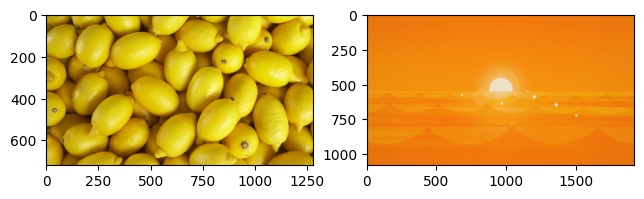

In [39]:
# Searching for yellow
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)

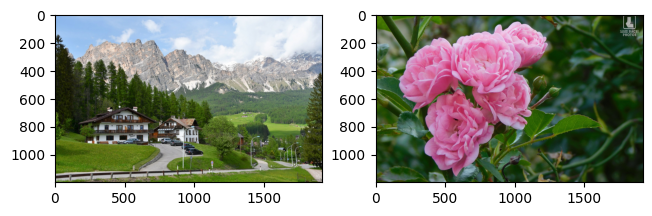

In [40]:
# Searching for green
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)